<a href="https://colab.research.google.com/github/Maradonas/FIAP-TECH-CHALLENGER-1/blob/main/EstudoProducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Producao.csv',sep=';')


In [6]:
display(df.iloc[:,3:].columns)
display(df.columns)

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

Index(['id', 'control', 'produto', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'],
      dtype='object')

In [7]:
df_melt = pd.melt(
    df
    ,id_vars=(['id','control','produto'])
    ,value_vars=df.iloc[:,3:].columns
    ,var_name = 'data'
)

In [8]:
df_melt['data'] = pd.to_datetime(df_melt['data'],format='%Y')

In [9]:
#df_melt[['produto','control']] = df_melt[['produto','control']].astype('category')

In [10]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       2754 non-null   int64         
 1   control  2754 non-null   object        
 2   produto  2754 non-null   object        
 3   data     2754 non-null   datetime64[ns]
 4   value    2754 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 107.7+ KB


In [11]:
df_melt_group = df_melt.loc[df_melt['control'].isin(['DERIVADOS','SUCO','VINHO DE MESA','VINHO FINO DE MESA (VINIFERA)'])]

df_melt_group = df_melt_group.loc[df_melt_group['data']>'2000']
#df_melt_group = df_melt_group.groupby(['produto','data'])

In [12]:
df_melt_group

,id,control,produto,data,value
1581,1,VINHO DE MESA,VINHO DE MESA,2001-01-01,228932458
1585,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),2001-01-01,34159277
1589,9,SUCO,SUCO,2001-01-01,17987182
1595,15,DERIVADOS,DERIVADOS,2001-01-01,15498842
1632,1,VINHO DE MESA,VINHO DE MESA,2002-01-01,259589740
...,...,...,...,...,...
2666,15,DERIVADOS,DERIVADOS,2022-01-01,138501226
2703,1,VINHO DE MESA,VINHO DE MESA,2023-01-01,169762429
2707,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),2023-01-01,46268556
2711,9,SUCO,SUCO,2023-01-01,67045238


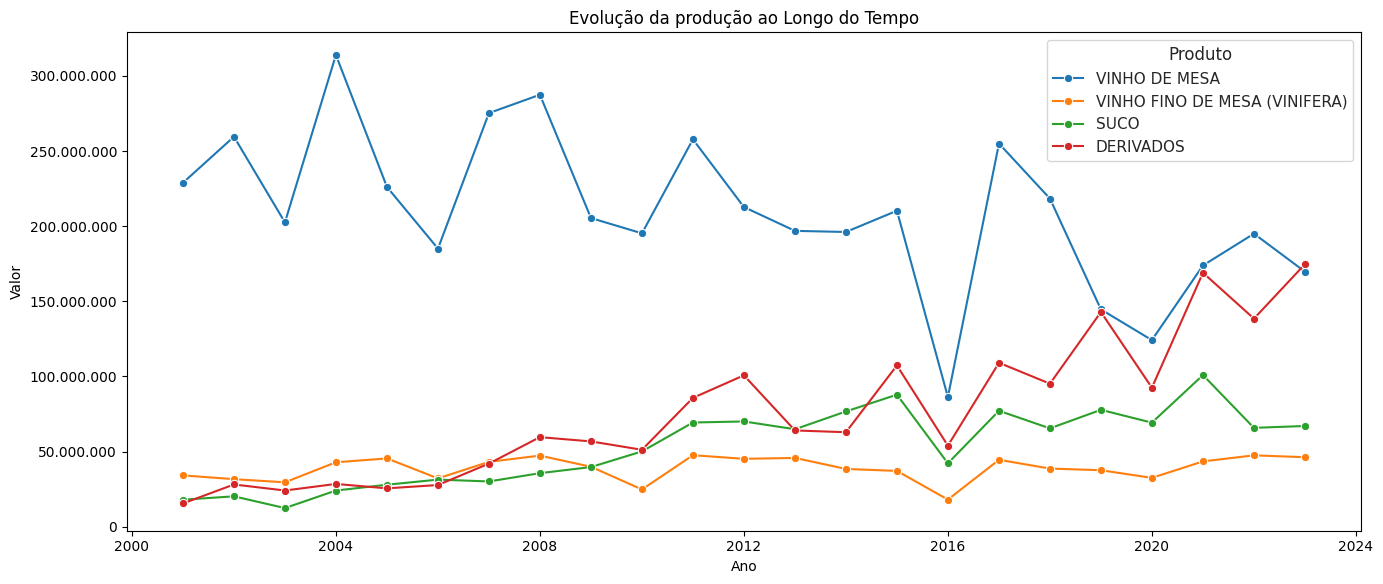

In [13]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_melt_group, x='data', y='value', hue='produto', marker='o')

sns.set(style='whitegrid')
# Formata o eixo Y com separador de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))

# Configurações extras
plt.title('Evolução da produção ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend(title='Produto')
plt.tight_layout()
plt.show()